In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, '$y_g$')

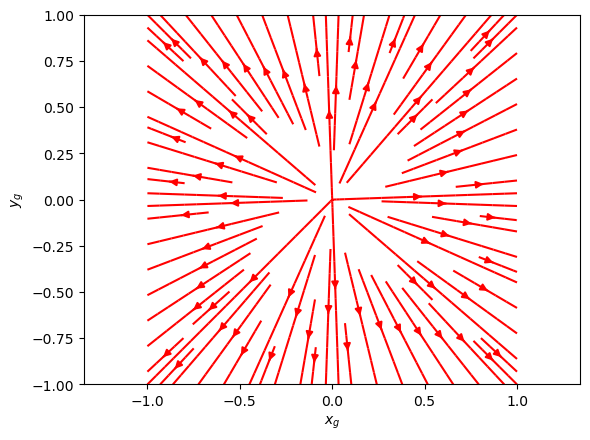

In [2]:
def Ex(x,y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return 1*np.cos(theta)

def Ey(x,y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return 1*np.sin(theta)

def Bx(x,y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return -1*np.sin(theta)

def By(x,y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return 1*np.cos(theta)


xmin = -1
ymin= -1
xmax = 1
ymax = 1
xgrid = np.linspace(xmin, xmax, 300)
ygrid = np.linspace(ymin, ymax, 300)

X, Y = np.meshgrid(xgrid, ygrid)

Ex_test = Ex(X,Y)
Ey_test = Ey(X,Y)

fig, axs = plt.subplots()

axs.streamplot(X, Y, Ex_test, Ey_test, color='red')
plt.axis('equal')
plt.xlabel(r'$x_g$')
plt.ylabel(r'$y_g$')


Text(0, 0.5, '$y_g$')

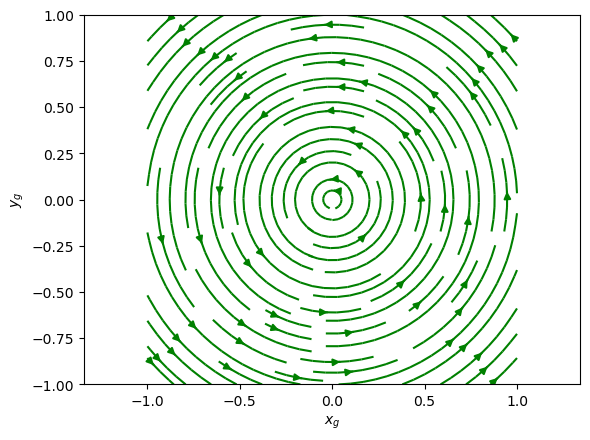

In [3]:
Bx_test = Bx(X,Y)
By_test = By(X,Y)

fig, axs = plt.subplots()

axs.streamplot(X, Y, Bx_test, By_test, color='green')
plt.axis('equal')
plt.xlabel(r'$x_g$')
plt.ylabel(r'$y_g$')

In [4]:
W = 1 # KeV
W = W*1.6022e-19*1000 # convert to jouls
e = 1.6022e-19 # proton charge
dl = 0.01 # thickness of slab
l = .2 # distance from point source to the slab
m = 1.6726e-27  # proton mass

def alpha_E(x,y):
    front = e*dl/(2*W)
    return np.array([front*Ex(x,y), front*Ey(x,y), 0])

def alpha_B(x,y):
    lhat = np.array([x, y, l])/np.sqrt(x**2 + y**2 + l**2)
    B = np.array([Bx(x,y), By(x,y), 0])
    lcrossB = np.cross(lhat, B)
    return e*dl*lcrossB/np.sqrt(2*m*W)

def alphatot(x,y):
    return alpha_E(x,y) + alpha_B(x,y)



In [5]:
alphaE = [np.zeros_like(X, dtype=float), np.zeros_like(X, dtype=float), np.zeros_like(X, dtype=float)]
alphaB = [np.zeros_like(X, dtype=float), np.zeros_like(X, dtype=float), np.zeros_like(X, dtype=float)]

for ix in range(X.shape[0]):
    for iy in range(Y.shape[1]):
        x = X[ix, iy]
        y = Y[ix, iy]
        alphaEi = alpha_E(x,y)
        alphaBi = alpha_B(x,y)

        # load up the x, y, and z componants of the deflection vector 
        alphaE[0][ix, iy] = alphaEi[0]
        alphaE[1][ix, iy] = alphaEi[1]
        alphaE[2][ix, iy] = alphaEi[2]

        alphaB[0][ix, iy] = alphaBi[0]
        alphaB[1][ix, iy] = alphaBi[1]
        alphaB[2][ix, iy] = alphaBi[2]





(-1.0, 1.0, -1.0, 1.0)

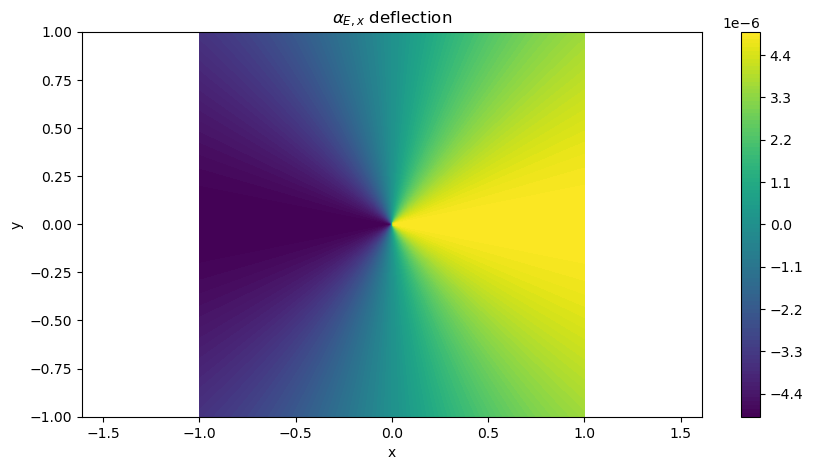

In [6]:
plt.figure(figsize=(10, 5))

plt.contourf(X,Y, alphaE[0], levels=100)
plt.title(r'$\alpha_{E,x}$ deflection')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.axis('equal')


(-1.0, 1.0, -1.0, 1.0)

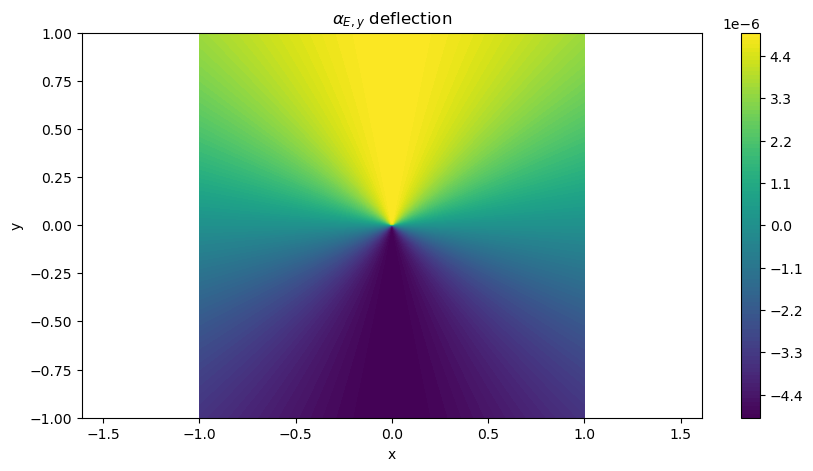

In [7]:
plt.figure(figsize=(10, 5))

plt.contourf(X,Y, alphaE[1], levels=100)
plt.title(r'$\alpha_{E,y}$ deflection')
plt.xlabel('x')
plt.ylabel(r'y')
plt.colorbar()
plt.axis('equal')

(-1.0, 1.0, -1.0, 1.0)

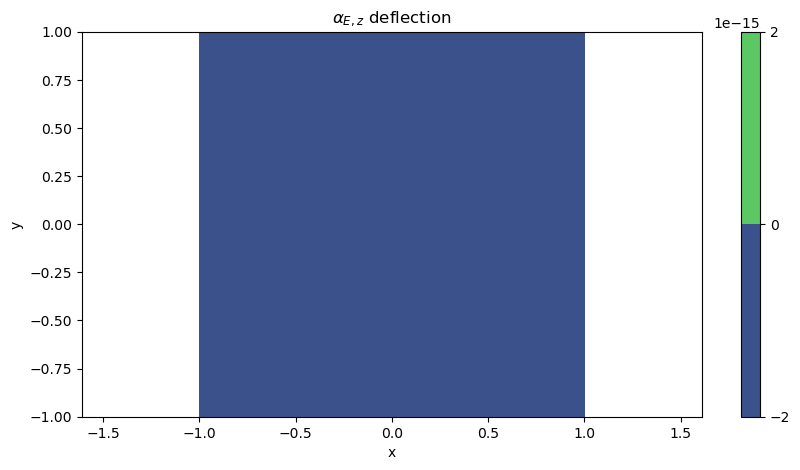

In [8]:
plt.figure(figsize=(10, 5))

plt.contourf(X,Y, alphaE[2], levels=100)
plt.title(r'$\alpha_{E,z}$ deflection')
plt.xlabel('x')
plt.ylabel(r'y')
plt.colorbar()
plt.axis('equal')

(-1.0, 1.0, -1.0, 1.0)

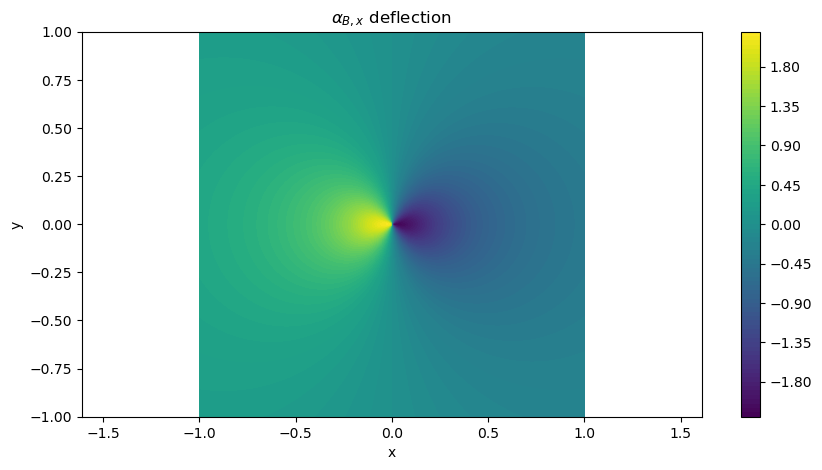

In [9]:
plt.figure(figsize=(10, 5))

plt.contourf(X,Y, alphaB[0], levels=100)
plt.title(r'$\alpha_{B,x}$ deflection')
plt.xlabel('x')
plt.ylabel(r'y')
plt.colorbar()
plt.axis('equal')

(-1.0, 1.0, -1.0, 1.0)

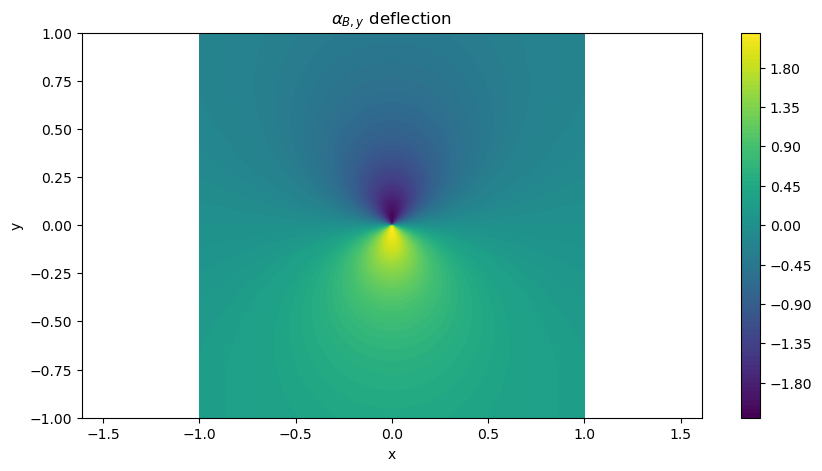

In [10]:
plt.figure(figsize=(10, 5))

plt.contourf(X,Y, alphaB[1], levels=100)
plt.title(r'$\alpha_{B,y}$ deflection')
plt.xlabel('x')
plt.ylabel(r'y')
plt.colorbar()
plt.axis('equal')

(-1.0, 1.0, -1.0, 1.0)

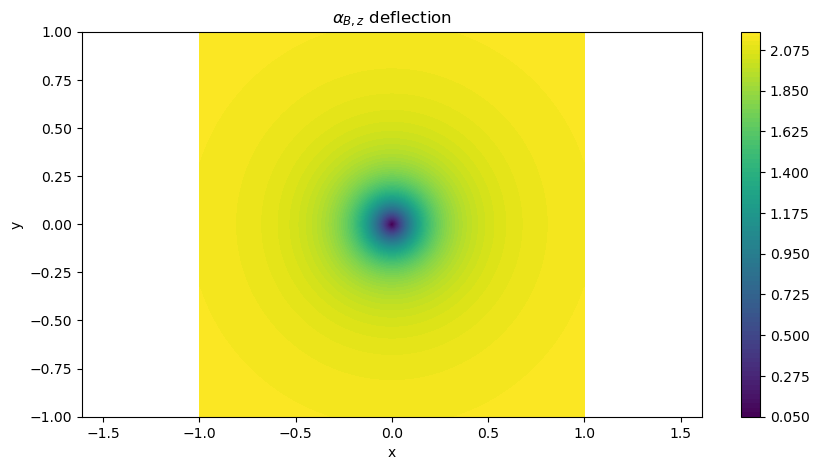

In [11]:
plt.figure(figsize=(10, 5))

plt.contourf(X,Y, alphaB[2], levels=100)
plt.title(r'$\alpha_{B,z}$ deflection')
plt.xlabel('x')
plt.ylabel(r'y')
plt.colorbar()
plt.axis('equal')

In [106]:
# New Fields section 
Ln = 0.1
LB = Ln/3
Ly = 1.2*Ln
B0 = 1
E0 = 1
pi = np.pi

def B1(x,y):
    rv = np.array([x, y+Ly, 0])
    r = np.sqrt(x**2 + (y+Ly)**2)
    if Ln-2*LB <= r and r <= Ln:
        rhat = rv/r
        zhat = np.array([0,0,1])

        phi = pi*(Ln-r)/(2*LB)
        return B0*np.sin(phi)*np.cross(rv, zhat)
    else:
        return np.array([0,0,0])

def B2(x,y):
    rv = np.array([x, y-Ly, 0])
    r = np.sqrt(x**2 + (y-Ly)**2)
    if Ln-2*LB <= r and r <= Ln:
        rhat = rv/r
        zhat = np.array([0,0,1])

        phi = pi*(Ln-r)/(2*LB)
        return B0*np.sin(phi)*np.cross(rv, zhat)
    else:
        return np.array([0,0,0])
    
def E1(x,y):
    rv = np.array([x, y+Ly, 0])
    r = np.sqrt(x**2 + (y+Ly)**2)
    if Ln-2*LB <= r and r <= Ln:
        rhat = rv/r
        phi = pi*(Ln-r)/(2*LB)
        return E0*np.sin(phi)*rhat
    else:
        return np.array([0,0,0])   
    
def E2(x,y):
    rv = np.array([x, y-Ly, 0])
    r = np.sqrt(x**2 + (y-Ly)**2)
    if Ln-2*LB <= r and r <= Ln:
        rhat = rv/r
        phi = pi*(Ln-r)/(2*LB)
        return E0*np.sin(phi)*rhat
    else:
        return np.array([0,0,0]) 

Bx1 = np.zeros_like(X)
By1 = np.zeros_like(X)
Ex1 = np.zeros_like(X)
Ey1 = np.zeros_like(X)

Bx2 = np.zeros_like(X)
By2 = np.zeros_like(X)
Ex2 = np.zeros_like(X)
Ey2 = np.zeros_like(X)


for ix in range(X.shape[0]):
    print(100*ix/X.shape[0], ' Percent Complete')
    for iy in range(X.shape[1]):
        x = X[ix, iy]
        y = Y[ix, iy]

        Bx1[ix, iy] = B1(x,y)[0]
        By1[ix, iy] = B1(x,y)[1]
        Ex1[ix, iy] = E1(x,y)[0]
        Ey1[ix, iy] = E1(x,y)[1]

        Bx2[ix, iy] = B2(x,y)[0]
        By2[ix, iy] = B2(x,y)[1]
        Ex2[ix, iy] = E2(x,y)[0]
        Ey2[ix, iy] = E2(x,y)[1]







0.0  Percent Complete
0.3333333333333333  Percent Complete
0.6666666666666666  Percent Complete
1.0  Percent Complete
1.3333333333333333  Percent Complete
1.6666666666666667  Percent Complete
2.0  Percent Complete
2.3333333333333335  Percent Complete
2.6666666666666665  Percent Complete
3.0  Percent Complete
3.3333333333333335  Percent Complete
3.6666666666666665  Percent Complete
4.0  Percent Complete
4.333333333333333  Percent Complete
4.666666666666667  Percent Complete
5.0  Percent Complete
5.333333333333333  Percent Complete
5.666666666666667  Percent Complete
6.0  Percent Complete
6.333333333333333  Percent Complete
6.666666666666667  Percent Complete
7.0  Percent Complete
7.333333333333333  Percent Complete
7.666666666666667  Percent Complete
8.0  Percent Complete
8.333333333333334  Percent Complete
8.666666666666666  Percent Complete
9.0  Percent Complete
9.333333333333334  Percent Complete
9.666666666666666  Percent Complete
10.0  Percent Complete
10.333333333333334  Percent C

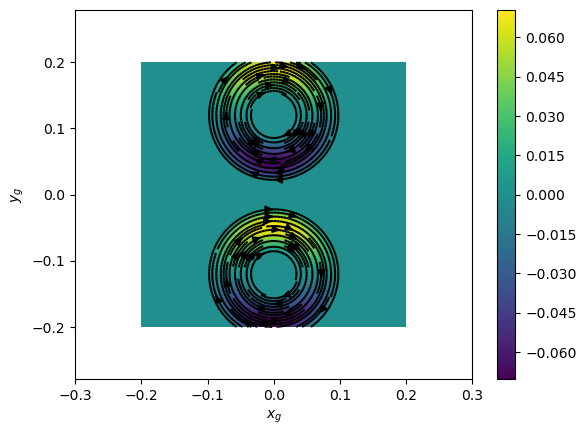

In [109]:
fig, axs = plt.subplots()
plt.contourf(X,Y,Bx1+Bx2, levels=100)
plt.colorbar()
plt.streamplot(X, Y, Bx1, By1, color='black', density=3)
plt.axis('equal')
plt.xlabel(r'$x_g$')
plt.ylabel(r'$y_g$')
plt.xlim((-Ly*2.5, Ly*2.5))
plt.ylim((-Ly*2.5, Ly*2.5))

plotboth = True
if plotboth == True:
    plt.streamplot(X, Y, Bx2, By2, color='black', density=3)


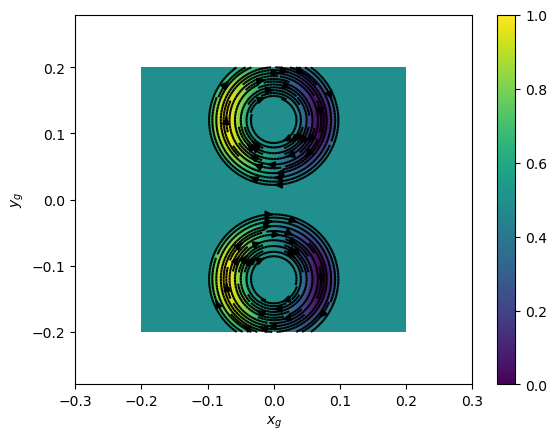

In [112]:
fig, axs = plt.subplots()


plt.streamplot(X, Y, Bx1, By1, color='black', density=3)
plt.axis('equal')
plt.xlabel(r'$x_g$')
plt.ylabel(r'$y_g$')
plt.xlim((-Ly*2.5, Ly*2.5))
plt.ylim((-Ly*2.5, Ly*2.5))
if plotboth == True:
    plt.contourf(X,Y,By1+By2, levels=100)
    plt.streamplot(X, Y, Bx2, By2, color='black', density=3)
else:
    plt.contourf(X,Y,By1, levels=100)
plt.colorbar()

(-0.3, 0.3)

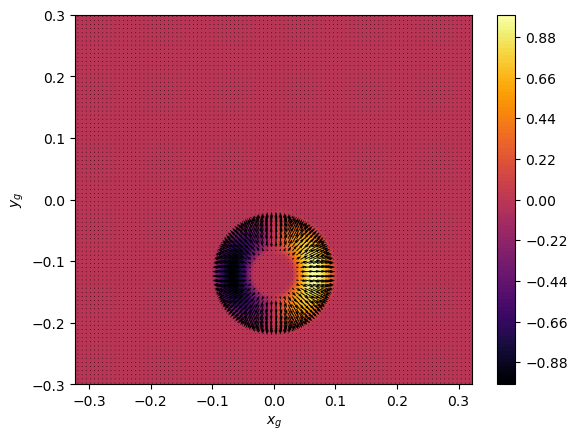

In [15]:
fig, axs = plt.subplots()
plt.contourf(X,Y,Ex1, levels=100, cmap='inferno')
plt.colorbar()
#plt.streamplot(X, Y, Ex1, Ey1, color='black', density=30)
plt.quiver(X,Y, Ex1, Ey1, scale=30, )
plt.axis('equal')
plt.xlabel(r'$x_g$')
plt.ylabel(r'$y_g$')
plt.xlim((-Ly*2.5, Ly*2.5))
plt.ylim((-Ly*2.5, Ly*2.5))

(-0.3, 0.3)

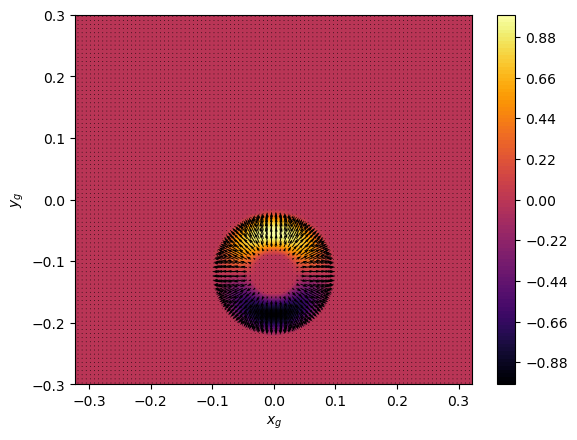

In [16]:
fig, axs = plt.subplots()
plt.contourf(X,Y,Ey1, levels=100, cmap='inferno')
plt.colorbar()
#plt.streamplot(X, Y, Ex1, Ey1, color='black', density=30)
plt.quiver(X,Y, Ex1, Ey1, scale=30, )
plt.axis('equal')
plt.xlabel(r'$x_g$')
plt.ylabel(r'$y_g$')
plt.xlim((-Ly*2.5, Ly*2.5))
plt.ylim((-Ly*2.5, Ly*2.5))

In [113]:
# meat and potatoes 

# Field settings 

Ln = 0.1
LB = Ln/3
Ly = 1.2*Ln
B0 = 100
E0 = 1
pi = np.pi

# particle energy and geometry settings 

Wkev = 0.001 # KeV
W = Wkev*1.6022e-19*1000 # convert to jouls
e = 1.6022e-19 # proton charge
dl = 0.00001 # thickness of slab
l = .2 # distance from point source to the slab
L = 1
m = 1.6726e-27  # proton mass
figomerit = (E0/B0)*np.sqrt(2)*m**0.5/(2*W**0.5)
print('figure of Merit: ', figomerit)
# mesh settings 

xmin = -0.24
ymin= -0.24
xmax = 0.24
ymax = 0.24
meshsize = 300
xgrid = np.linspace(xmin, xmax, meshsize)
ygrid = np.linspace(ymin, ymax, meshsize)

X, Y = np.meshgrid(xgrid, ygrid)

# set up alpha to use the correct fields 

def alpha_E(x,y):
    front = e*dl/(2*W)
    return np.array([front*E1(x,y)[0], front*E1(x,y)[1], 0])

def alpha_B(x,y):
    lhat = np.array([x, y, l])/np.sqrt(x**2 + y**2 + l**2)
    B = np.array([B1(x,y)[0], B1(x,y)[1], 0])
    lcrossB = np.cross(lhat, B)
    return e*dl*lcrossB/np.sqrt(2*m*W)

def alphatot(x,y):
    return alpha_E(x,y) + alpha_B(x,y)

figure of Merit:  7.224747687889433e-07


In [114]:
# calculate alphaE and alphaB

alphaE = [np.zeros_like(X, dtype=float), np.zeros_like(X, dtype=float), np.zeros_like(X, dtype=float)]
alphaB = [np.zeros_like(X, dtype=float), np.zeros_like(X, dtype=float), np.zeros_like(X, dtype=float)]

for ix in range(X.shape[0]):
    for iy in range(Y.shape[1]):
        x = X[ix, iy]
        y = Y[ix, iy]
        alphaEi = alpha_E(x,y)
        alphaBi = alpha_B(x,y)

        # load up the x, y, and z componants of the deflection vector 
        alphaE[0][ix, iy] = alphaEi[0]
        alphaE[1][ix, iy] = alphaEi[1]
        alphaE[2][ix, iy] = alphaEi[2]

        alphaB[0][ix, iy] = alphaBi[0]
        alphaB[1][ix, iy] = alphaBi[1]
        alphaB[2][ix, iy] = alphaBi[2]

In [115]:
# prepare a record of the x and y screen locations of the arriving protons. 

xs = np.array([])
ys = np.array([])

for ixg in range(X.shape[0]):
    for iyg in range(Y.shape[1]):
        xg = X[ixg, iyg]
        yg = Y[ixg, iyg]

        x0 = np.array([xg, yg, l]) # create X0 vector from point source to grid

        #get the deflection vector x, y, and z componants at the grid location ixg, iyg   
        alphaEg = np.array([alphaE[0][ixg, iyg], alphaE[1][ixg, iyg], alphaE[2][ixg, iyg]])
        alphaBg = np.array([alphaB[0][ixg, iyg], alphaB[1][ixg, iyg], alphaB[2][ixg, iyg]])
        alphatotg = alphaEg + alphaBg

        xv = x0 + x0*L/l + alphatotg*l

        # Load up the location of where the proton hits the detector screen 
        xs = np.append(xs, xv[0])
        ys = np.append(ys, xv[1])




In [91]:
# print(xs.shape, ys.shape)
# plt.scatter(1,1,alpha=.8, s=1)
# print(W)

Text(0.5, 1.0, 'One bubble, W = 0.001 KeV')

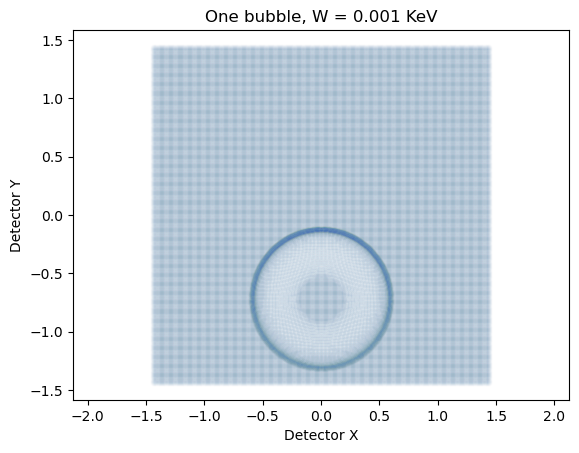

In [116]:
plt.scatter(xs, ys, alpha=0.01, s=10)
plt.axis('equal')
plt.ylabel('Detector Y')
plt.xlabel('Detector X')
plt.title(f'One bubble, W = {round(Wkev, 3)} KeV')

In [ ]:
# Two bubble section 